# Tabular Playground Series - Aug 2021

In [7]:
# Required modules

import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from zipfile import ZipFile
from google.colab import drive
from matplotlib import pyplot as plt

In [2]:
# Config

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)

In [6]:
# Mounting the drive

drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Copying data into workspace

shutil.copy('/content/drive/MyDrive/myKaggle/Tabular Playground Series/tabular-playground-series-aug-2021.zip', 'tabular-playground-series-aug-2021.zip')

'tabular-playground-series-aug-2021.zip'

In [9]:
# Extracting the data

with ZipFile('/content/tabular-playground-series-aug-2021.zip', 'r') as zf:
    zf.extractall('./')

In [13]:
# Load the train data

train = pd.read_csv('train.csv', index_col=['id'])
train.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.002350,59,0.766739,-1.350460,42.2727,16.68570,30.3599,1.267300,0.392007,1.09101,1.96874,1.874640,117.286,6.716200,0.985656,0.973428,4004232,0.377896,1.033820,0.574531,0.122371,8.18617,1517.830,3.13219,0.112836,5.01868,116.766,10891,8.19366,5.79715,1.09999,14.86840,-0.275434,0.915721,167.800,-7.534140,4.23632,1.629560,1.144400,-0.303139,...,70.9733,0.380057,0.031812,1.09527,0.563482,0.122689,1.160720,1.69391,1.07217,65.1543,0.022504,-5.6068,1.798660,0.528068,6696.300,-0.562078,1.301020,6.71624,1.143470,2.29983,0.010485,-0.127223,0.231086,4.51614,0.594494,397,0.264022,8.68790,15.070100,0.376622,-42.43990,26.854000,1.45751,0.696161,0.941764,1.828470,0.924090,2.29658,10.48980,15
1,0.784462,145,-0.463845,-0.530421,27324.9000,3.47545,160.4980,0.828007,3.735860,1.28138,-2.73947,-0.529506,157.670,0.696384,1.441230,0.159056,23567462,-0.089583,-0.711628,-1.045860,0.139920,3.69294,-123.354,7.74097,-0.852302,8.51025,161.175,87801,12.02020,1.78393,1.23100,10.14970,-0.018724,1.011280,127.401,11.821400,5.99681,-0.953850,1.379370,1.079530,...,75.5602,1.987990,0.318177,1.14901,0.723574,0.184821,-0.348303,-7.17633,1.46258,43.1121,-0.060801,64.0455,2.358450,5.759690,3958.140,1.576610,-1.241790,5.91412,0.959826,2.56631,0.000652,-0.335617,-0.271723,5.10319,8.706220,98,0.210513,7.86416,3.371900,0.147973,-184.13200,7.901370,1.70644,-0.494699,-2.058300,0.819184,0.439152,2.36470,1.14383,3
2,0.317816,19,-0.432571,-0.382644,1383.2600,19.71290,31.1026,-0.515354,34.430800,1.24210,2.90180,-0.960340,118.590,7.696420,1.488760,0.387277,235760,0.055568,0.268560,0.718133,0.027133,11.67340,270.247,3.44051,-0.679071,13.37810,150.362,14173,1.69954,7.04728,1.10513,7.62871,0.685721,0.809485,120.064,194.427000,6.77866,0.634136,0.934386,0.926980,...,99.4933,5.098040,0.258909,1.16878,0.049053,0.173547,0.937000,2.05947,1.22245,50.2267,-0.026215,71.6849,2.434170,1.904560,27165.800,-0.773223,-1.833390,4.98548,1.170870,1.17201,0.016848,-0.235581,-0.724935,3.22565,4.170990,105,-0.155451,8.91829,0.186334,0.335985,7.43721,37.218100,3.25339,0.337934,0.615037,2.216760,0.745268,1.69679,12.30550,6
3,0.210753,17,-0.616454,0.946362,-119.2530,4.08235,185.2570,1.383310,-47.521400,1.09130,-1.51200,-1.292340,125.461,7.343230,-3.092390,0.713795,1146032,0.326534,0.454842,0.219958,0.037982,5.15195,4893.860,6.89751,-0.830552,4.43184,132.855,77147,32.80900,4.06390,1.11911,3.91776,0.500353,0.206448,120.411,233.537000,7.75131,0.625762,-1.940810,1.333210,...,60.8082,2.357590,0.239080,1.16116,0.535797,0.222185,1.163120,2.36343,1.41530,116.1820,0.018674,55.4428,2.228240,4.303600,2643.760,-1.666320,0.792398,6.45162,1.077330,2.90676,0.023735,-0.091992,-0.098701,4.27820,5.347530,512,0.855981,8.27663,4.066650,0.336490,9.66778,0.626942,1.49425,0.517513,-10.222100,2.627310,0.617270,1.45645,10.02880,2
4,0.439671,20,0.968126,-0.092546,74.3020,12.30650,72.1860,-0.233964,24.399100,1.10151,1.77348,-0.546781,147.186,17.394300,0.964678,0.964894,19272478,0.121071,0.422461,-0.103100,-0.000910,8.14191,162.713,1.56561,-0.300743,7.56458,160.995,5780,-1.54254,8.09081,1.60582,7.04632,-1.056850,1.727440,126.848,0.910761,6.08868,0.150619,1.134610,1.553550,...,103.9900,4.396300,0.248451,1.18082,0.546460,0.140713,0.804404,7.55191,-2.50995,68.2459,0.001230,47.2885,0.461938,1.072440,703.401,0.691108,5.014080,6.06393,1.120250,1.73348,-0.001272,-0.333872,-0.063781,1.11420,5.233990,109,-0.158318,5.43062,0.991616,0.528518,290.65700,15.604300,1.73557,-0.476668,1.390190,2.195740,0.826987,1.78485,7.07197,1


In [14]:
# Inspecting the data

train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 0 to 249999
Columns: 101 entries, f0 to loss
dtypes: float64(95), int64(6)
memory usage: 194.5 MB


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,loss
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,2.500000e+05,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.511213,51.378476,0.107155,0.050010,3595.133426,8.205953,164.508753,0.375533,16.669745,1.190382,0.063664,0.095226,136.746037,8.034918,0.614930,0.752971,8.891112e+06,0.009645,0.041674,0.074226,0.321328,9.928838,3622.094586,7.413526,-0.480271,6.046948,137.635093,47223.903504,5.469358,7.155835,1.206363,6.461029,-0.018490,1.574449,136.830167,173.530314,6.283875,0.157174,0.502435,0.848153,...,68.257992,4.672625,0.214381,1.194280,0.474751,0.216206,0.939638,1.668524,0.918009,68.939811,0.012219,64.709567,2.239319,3.495883,4430.718917,-0.159048,0.734153,6.416185,1.185112,1.973585,0.014504,-0.455453,0.245507,3.893001,4.400483,253.135672,0.258360,7.154004,7.759941,0.581002,4856.812768,22.579100,2.030554,0.079692,1.555097,2.417556,0.537484,1.576900,8.048805,6.813920
std,0.307884,42.396636,1.322200,0.792368,6072.401061,5.475723,183.335563,0.813597,99.758709,0.099700,2.433281,0.935765,14.422095,5.487786,1.619192,0.626172,8.508967e+06,0.103460,0.684975,0.739724,0.337792,5.661423,6328.918702,3.740530,0.712486,3.172873,15.710846,36013.179913,7.716520,3.443207,0.134848,2.451240,0.787275,1.109286,14.816130,201.166381,3.530354,1.728653,1.789297,0.627197,...,35.655549,2.913057,0.101787,0.099982,0.218068,0.098362,0.732696,10.179813,2.854904,38.940318,0.090087,31.343334,0.735150,1.935741,8050.232085,0.840284,3.344094,2.016620,0.101610,0.689412,0.025504,0.228070,0.700630,1.592608,1.089594,338.972888,0.703873,3.698234,11.378365,0.445022,8501.609009,14.849390,0.900211,0.587780,9.253785,0.892563,0.226589,0.646306,5.647368,7.940179
min,-0.069273,-17.000000,-7.895580,-1.475560,-7589.280000,-3.291050,-40.967200,-4.143080,-502.813000,0.934037,-10.261200,-1.858720,108.086000,-2.115510,-8.648960,-1.805330,-1.173084e+06,-0.341300,-2.777610,-3.693950,-0.029620,-0.732186,-10875.700000,0.095849,-1.771980,-2.759340,100.861000,-3391.000000,-4.283380,0.404425,0.842903,-0.883213,-1.824650,-0.431699,105.359000,-29.524300,-2.776090,-13.697300,-5.747540,-1.496630,...,-16.770000,-1.608820,-0.050361,0.791808,-0.025645,-0.059566,-1.625720,-26.624000,-16.388300,-10.036200,-0.294238,-21.852000,-1.267630,-1.041160,-11332.100000,-2.753550,-43.048000,1.143390,0.902514,-0.554585,-0.122903,-0.994638,-1.540880,0.456437,-3.751090,-26.000000,-1.247060,-0.031391,-9.396700,-0.379189,-12695.700000,-4.059170,0.057800,-1.998800,-24.686300,-1.131980,0.005249,-0.646967,-0.842397,0.000000
25%,0.251287,18.000000,-0.611172,-0.719418,163.864750,4.110127,27.894900,-0.026245,-17.392025,1.132640,-1.246857,-0.775796,124.486000,3.917245,-0.552543,0.331163,9.710185e+05,-0.0476

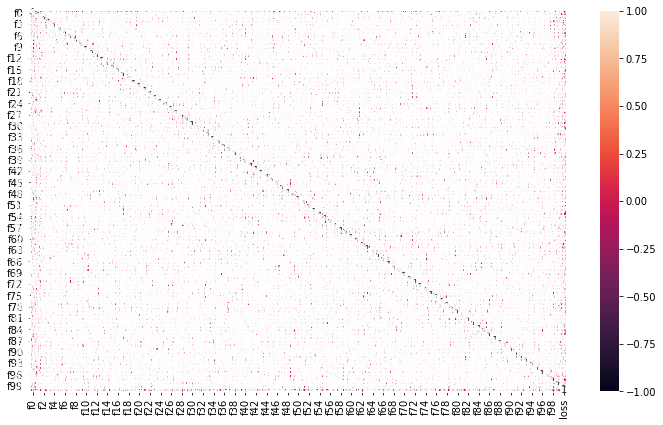

In [15]:
# Correlation matrix

sns.heatmap(train.corr(), annot=True, vmin=-1, vmax=1)

In [16]:
# Separating out features and labels

X = train.drop(['loss'], axis=1)
y = train[['loss']]

## ML Part

In [22]:
# Model Definition

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(100,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

In [23]:
# Custom metrics

def rmse(y_true, y_pred):
    return tf.math.sqrt(tf.keras.losses.mean_squared_error(y_true, y_pred))

In [24]:
# Compiling the model

optim = tf.keras.optimizers.Adam()
loss = tf.keras.losses.mean_squared_error

model.compile(optimizer=optim, loss=loss, metrics=[rmse])

In [25]:
# Model fitting

epochs = 50
batch_size = 32

model.fit(X, y, validation_split=0.2, epochs=epochs, batch_size=batch_size)

Epoch 1/50
6250/6250 [==============================] - 8s 1ms/step - loss: 36673429700608.0000 - rmse: 588312.0625 - val_loss: 17465876.0000 - val_rmse: 2875.1101
Epoch 2/50
6250/6250 [==============================] - 8s 1ms/step - loss: 2710739353600.0000 - rmse: 344223.0625 - val_loss: 124491256.0000 - val_rmse: 9413.4053
Epoch 3/50
6250/6250 [==============================] - 8s 1ms/step - loss: 605606576128.0000 - rmse: 203243.0938 - val_loss: 14755631104.0000 - val_rmse: 104197.1719
Epoch 4/50
6250/6250 [==============================] - 7s 1ms/step - loss: 204095799296.0000 - rmse: 107707.0625 - val_loss: 1259932.0000 - val_rmse: 374.4084
Epoch 5/50
6250/6250 [==============================] - 7s 1ms/step - loss: 8346093056.0000 - rmse: 16076.5771 - val_loss: 2510514.0000 - val_rmse: 1258.9131
Epoch 6/50
6250/6250 [==============================] - 7s 1ms/step - loss: 4924299264.0000 - rmse: 2418.8552 - val_loss: 102.0187 - val_rmse: 6.5251
Epoch 7/50
6250/6250 [===============

In [26]:
# Load test data

test = pd.read_csv('test.csv', index_col=['id'])
test.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
250000,0.812665,15,-1.239120,-0.893251,295.5770,15.87120,23.04360,0.942256,29.898000,1.11394,-1.312220,-1.110000,128.357,7.34446,-1.03063,2.304030,13018510,0.019558,0.757686,-0.716056,0.022330,0.141964,8938.110,6.44370,1.133730,6.527050,148.030,80178,3.434410,5.53518,1.27952,8.23541,-1.306460,1.110690,153.408,50.8583,8.34922,-0.717611,1.93471,0.974460,...,2.726430e+09,100.6200,5.18241,0.264471,1.19025,0.566016,0.354571,1.312390,14.37410,0.839548,119.689000,-0.050117,62.5088,1.55966,2.77633,-50.0871,0.247334,0.035339,6.34367,1.17657,2.10436,0.010519,-0.393985,-0.243344,3.77018,4.63545,52,-0.144592,3.81875,-0.347570,0.446389,-422.332,-1.44630,1.69075,1.059300,-3.010570,1.94664,0.529470,1.386950,8.78767
250001,0.190344,131,-0.501361,0.801921,64.8866,3.09703,344.80500,0.807194,38.421900,1.09695,-5.636550,1.287090,128.250,6.69085,1.83633,0.616096,1618530,0.067314,-0.808238,-0.320105,0.998695,15.113900,1432.860,1.57510,-1.078910,2.804750,158.629,78013,0.869545,15.60280,1.24232,5.18894,-1.384710,0.893887,168.000,58.9003,6.44828,1.195220,1.94325,0.966581,...,6.191160e+09,112.3230,1.66891,0.292888,1.23355,0.558571,0.268359,0.980215,9.97976,1.821440,-1.325480,0.047512,20.8764,1.87620,3.72237,268.4940,-0.477587,1.693870,6.82245,1.21945,1.20199,-0.001996,-0.382959,0.124060,2.11821,5.18402,70,0.256226,18.03120,23.572300,0.377179,10352.200,21.06270,1.84351,0.251895,4.440570,1.90309,0.248534,0.863881,11.79390
250002,0.919671,19,-0.057382,0.901419,11961.2000,16.39650,273.24000,-0.003300,37.940000,1.15222,-3.403280,0.142553,152.386,15.08520,1.55487,1.654750,17563785,-0.166851,-1.262700,1.411200,0.003990,8.780170,4043.780,7.05112,-1.012880,10.044500,121.983,88912,-0.486979,8.97968,1.19842,8.58212,-0.293621,1.883580,120.411,110.3600,5.18177,1.365780,-1.25788,0.928871,...,3.349070e+09,34.8437,5.33377,0.351806,1.38724,0.392356,0.148567,1.076470,5.34354,-2.062490,144.710000,-0.169986,39.3509,2.32312,3.01259,23.2484,0.511384,1.325380,7.33185,1.17367,1.39359,0.001120,-0.199941,0.027405,4.31420,3.24285,501,-0.141364,4.78365,0.068378,0.990140,3224.020,-2.25287,1.55100,-0.559157,17.838600,1.83385,0.931796,2.336870,9.05400
250003,0.860985,19,-0.549509,0.471799,7501.6000,2.80698,71.08170,0.792136,0.395235,1.20157,0.870915,1.271310,157.147,5.84885,1.38564,0.617328,252991,0.108450,0.479338,-0.719770,0.319796,25.200300,-170.328,7.52639,0.739869,0.736874,129.194,15850,11.321700,4.59213,1.38778,4.91686,-0.010639,5.175640,118.858,13.9613,2.38068,0.883522,1.28392,1.427330,...,2.364120e+09,50.3343,2.28095,0.120234,1.19965,0.666303,0.374107,1.295360,6.90924,-0.851826,0.407165,-0.057441,41.2673,3.05986,2.84968,292.1960,-1.121020,-0.070187,12.16710,1.16699,1.72514,0.000551,-0.616739,-0.375774,6.05398,4.43417,43,-0.221611,8.38631,0.602831,1.396880,9689.760,14.77150,1.41390,0.329272,0.802437,2.23251,0.893348,1.359470,4.84833
250004,0.313229,89,0.588509,0.167705,2931.2600,4.34986,1.57187,1.118300,7.754630,1.16807,0.671417,1.639820,128.023,17.33360,1.97164,0.252077,481327,0.102064,-0.442613,-0.636058,0.023135,13.507000,10276.200,3.36025,-1.425710,5.315750,139.739,10964,3.074100,5.44446,1.14152,7.27390,0.262139,1.241720,118.918,778.0400,7.34067,0.654133,1.27790,0.983787,...,7.542740e+09,121.8600,4.11762,0.203425,1.23336,0.463874,0.253861,0.603420,-2.93654,1.201570,77.547100,0.042033,58.9586,3.61125,1.85938,22610.8000,1.163770,-1.969720,6.87258,1.15139,1.66279,0.012828,-0.201460,-0.087082,3.44778,5.18196,94,1.489310,7.49886,1.212050,0.862502,2693.350,44.18050,1.58020,-0.191021,26.253000,2.68238,0.361923,1.532800,3.70660


In [27]:
# Predictioin

test_pred = model.predict(test)
test_pred

array([[6.9145803],
       [6.9145803],
       [6.9145803],
       ...,
       [6.9145803],
       [6.9145803],
       [6.9145803]], dtype=float32)

In [28]:
# Output

submission = pd.DataFrame(test_pred)
submission['id'] = test.index
submission.columns = ['loss', 'id']
submission.to_csv('output.csv', index=False)